#### **Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn_som.som import SOM


#### **Get file data**

###### **Get data to train**

In [2]:
data = pd.read_csv("Learning_data10.txt", sep='\t', header=None)
data.columns = [f"Var{i}" for i in range(data.shape[1])]
data.head()

,Var0,Var1,Var2,Var3,Var4,Var5,Var6,Var7
0,8,6,7,5,6,5,8,7
1,7,6,7,5,5,5,8,7
2,6,3,5,4,6,4,7,6
3,8,6,7,7,8,7,8,8
4,9,9,9,8,9,9,10,9


###### **Get data to visualize**

In [3]:
visualize_data = pd.read_csv("PCA_data10.txt", sep='  ', header=None)
visualize_data.columns = [f"Var{i}" for i in range(visualize_data.shape[1])]
visualize_data.head()

C:\Users\Arseny\AppData\Local\Temp\ipykernel_27352\3164875457.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  visualize_data = pd.read_csv("PCA_data10.txt", sep='  ', header=None)


,Var0,Var1
0,-0.417258,0.732461
1,-0.838965,1.029533
2,-2.759935,-0.346656
3,0.900784,-0.425621
4,3.582997,0.165852


Text(0.5, 1.0, 'Two main components visualization')

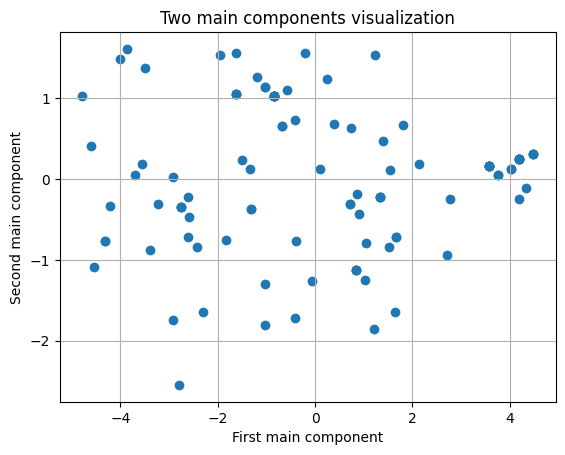

In [4]:
plt.scatter(visualize_data.iloc[:, 0].T, visualize_data.iloc[:, 1].T)
plt.grid()
plt.xlabel("First main component")
plt.ylabel("Second main component")
plt.title("Two main components visualization")

#### **Create Kohonen's network class**

In [5]:
som = SOM(m=2, n=2, dim=data.shape[1], lr=1, max_iter=100)
som.fit(data.to_numpy())

In [6]:
predictions = som.predict(data.to_numpy().astype(float))
predictions

array([0, 0, 2, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0,
       1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 0, 3,
       2, 1, 2, 0, 1, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 3, 2, 1, 2, 0,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 3, 2, 2, 2, 2, 1, 3, 2, 3, 2,
       0, 0, 1, 3, 1, 2, 3, 3, 1, 3, 1, 2], dtype=int64)

Text(0.5, 1.0, 'Components scatter plot')

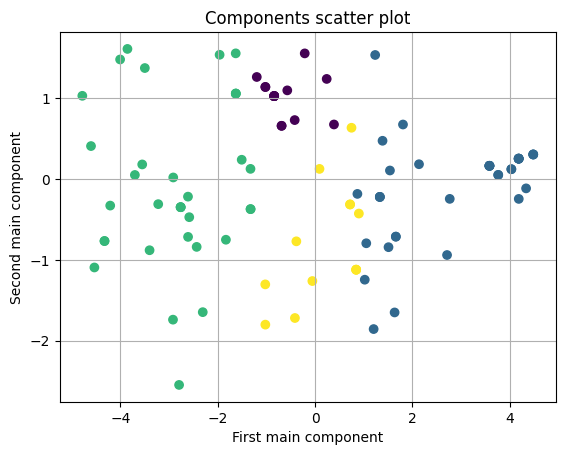

In [7]:
plt.scatter((visualize_data.iloc[:, 0]).T, (visualize_data.iloc[:, 1]).T, c=predictions)
plt.grid()
plt.xlabel("First main component")
plt.ylabel("Second main component")
plt.title("Components scatter plot")

#### **Find mean values of every cluster**

In [8]:
data_by_clusters = np.array([data.iloc[i == predictions].to_numpy() for i in range(4)]);
visualize_data_by_clusters = np.array([visualize_data.iloc[i == predictions].to_numpy() for i in range(4)]);

C:\Users\Arseny\AppData\Local\Temp\ipykernel_27352\1938863559.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_by_clusters = np.array([data.iloc[i == predictions].to_numpy() for i in range(4)]);
C:\Users\Arseny\AppData\Local\Temp\ipykernel_27352\1938863559.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  visualize_data_by_clusters = np.array([visualize_data.iloc[i == predictions].to_numpy() for i in range(4)]);


In [9]:
mean_data_by_clusters = np.array([(data.iloc[i == predictions]).mean(axis=0) for i in range(4)]);
mean_visualize_data_by_clusters = np.array([(visualize_data.iloc[i == predictions]).mean(axis=0) for i in range(4)]);

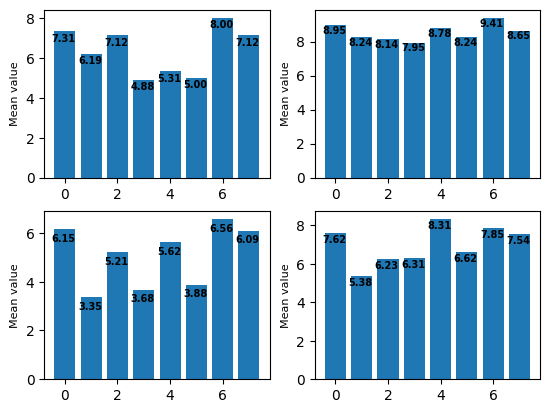

In [10]:
N = 2
fig, axes = plt.subplots(nrows=2, ncols=2)
for i, j in zip([0, 1, 0, 1], [0, 0, 1, 1]):
    axes[i, j].bar(np.arange(len(mean_data_by_clusters[i*N+j])), mean_data_by_clusters[i*N+j])
    axes[i, j].set_ylabel("Mean value", size=8)
    
    for count, v in enumerate(mean_data_by_clusters[i*N+j]):
        axes[i, j].text(count-0.5, v - 0.5, str(f"{v:.2f}"), color='black', fontweight='bold', size=7)

In [11]:
mean_visualize_data_by_clusters

array([[-0.63819341,  1.02270602],
       [ 2.8268109 , -0.1036088 ],
       [-2.85903059, -0.05952874],
       [ 0.21739472, -0.80813796]])

#### **Visualize data with ceneters**

Text(0.5, 1.0, 'Components scatter plot')

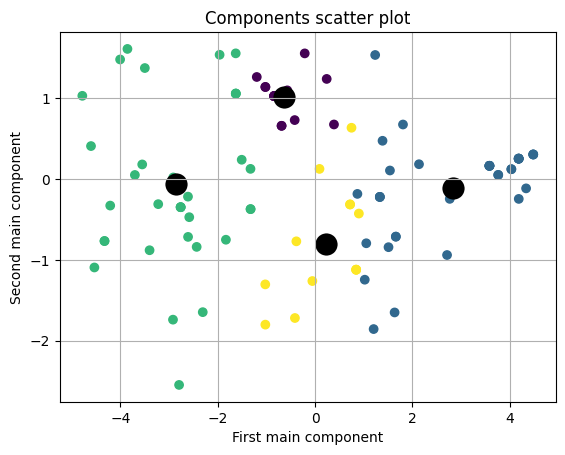

In [12]:
plt.scatter((visualize_data.iloc[:, 0]).T, (visualize_data.iloc[:, 1]).T, c=predictions)
plt.scatter(mean_visualize_data_by_clusters[:, 0].T, mean_visualize_data_by_clusters[:, 1].T, \
            linewidths=10, c="black")
plt.grid()
plt.xlabel("First main component")
plt.ylabel("Second main component")
plt.title("Components scatter plot")